In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [141]:
data = pd.read_csv("https://raw.githubusercontent.com/Suleyyy/ML_Depresja/refs/heads/main/depresja_z_kaggla.csv").drop(columns='id')

data

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


dane zawierają informacje osób na temat: <br>
płci,<br>
wieku (18-59),<br>
miasto (w Indiach xd),<br>
presja akademicka w skali(0-5),<br>
presja w pracy (0-5),<br>
CGPA - jakiś hinduski system na studiach w skali 0-10 (średnia ważona wszystkich ocen),<br>
staysfakcja ze studiów i pracy,<br>
ilość snu,<br>
nawyki żywieniowe,<br>
stopień naukowy,<br>
czy chciał skoczyć na bungee bez liny,<br>
ile godzin pracuje/studiuje(0-12),<br>
stress finansowy (0-),<br>
czy rodzina była psychicznie chora,<br>
target - depresja.<br>
Część danych to tekst cześć to liczby zmiennoprzecinkowe<br>
Wierszy z danymi jest 27901<br>

In [142]:
data.dtypes

,0
Gender,object
Age,float64
City,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64
Study Satisfaction,float64
Job Satisfaction,float64
Sleep Duration,object


In [143]:
data.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [144]:
data.describe(include='object')

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,6,2
top,Male,Kalyan,Student,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No
freq,15547,1570,27870,8310,10317,6080,17656,6715,14398


In [145]:
data.isnull().sum()

,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0
Sleep Duration,0


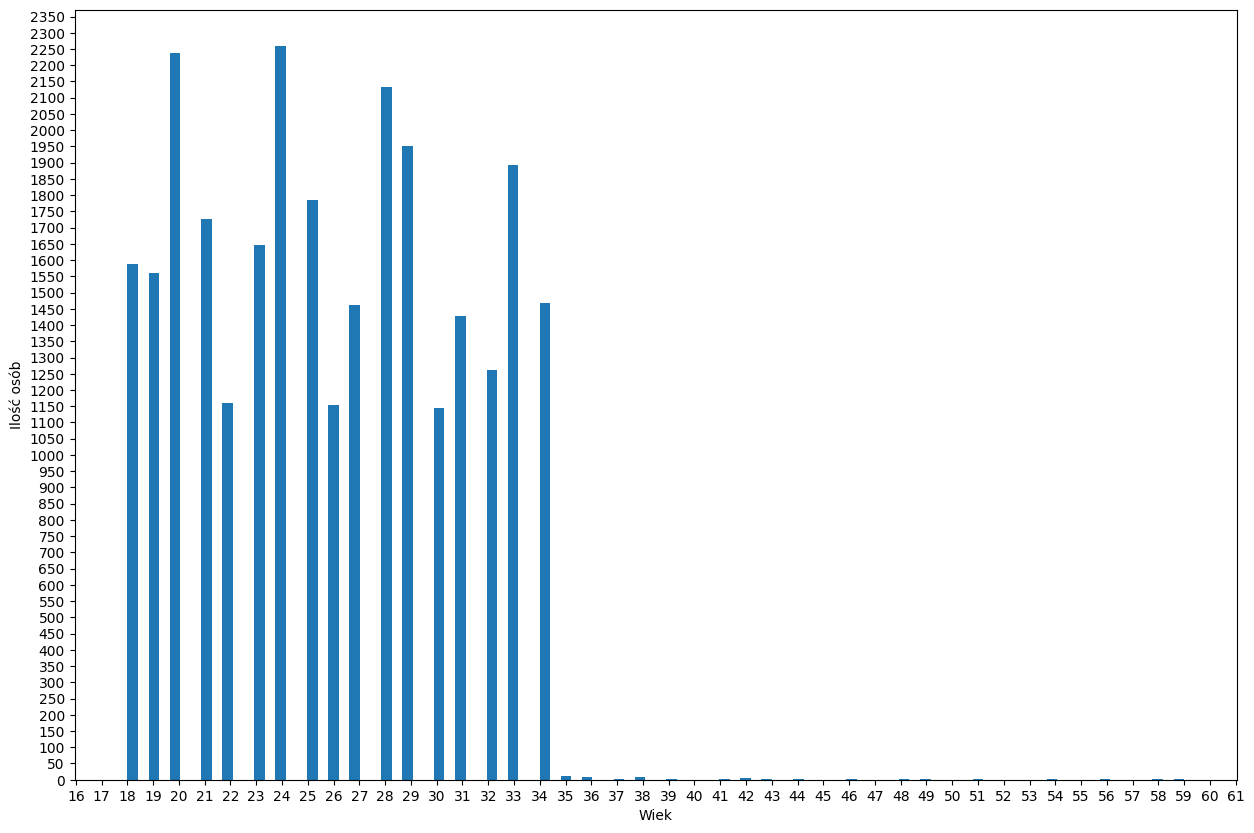

In [146]:
def age_plot(data):
    plt.figure(figsize=(15,10))
    plt.hist(data['Age'], bins=100)
    plt.ylabel('Ilość osób')
    plt.xlabel('Wiek')
    plt.locator_params('both', nbins=50)

age_plot(data)

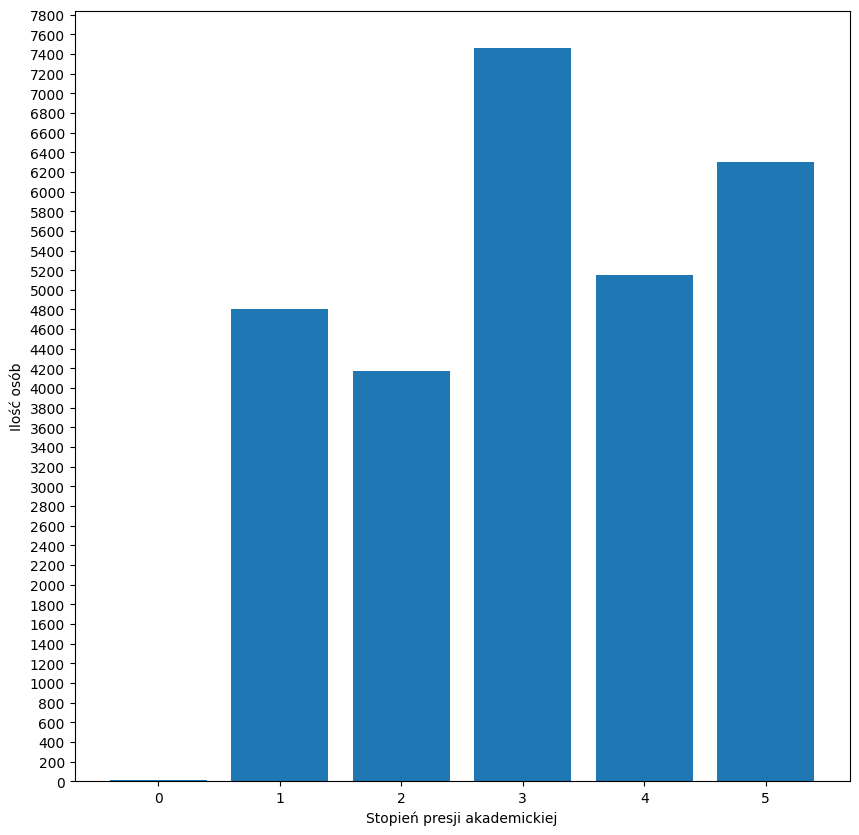

In [147]:

def pressure_plot(data):
    plt.figure(figsize=(10,10))
    plt.hist(data['Academic Pressure'], bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth=0.8)
    plt.ylabel('Ilość osób')
    plt.xlabel('Stopień presji akademickiej')
    plt.locator_params('x', nbins=10)
    plt.locator_params('y', nbins=50)
pressure_plot(data)

In [148]:
data['Academic Pressure'].value_counts().sort_index()

,count
Academic Pressure,
0.0,9
1.0,4801
2.0,4178
3.0,7462
4.0,5155
5.0,6296


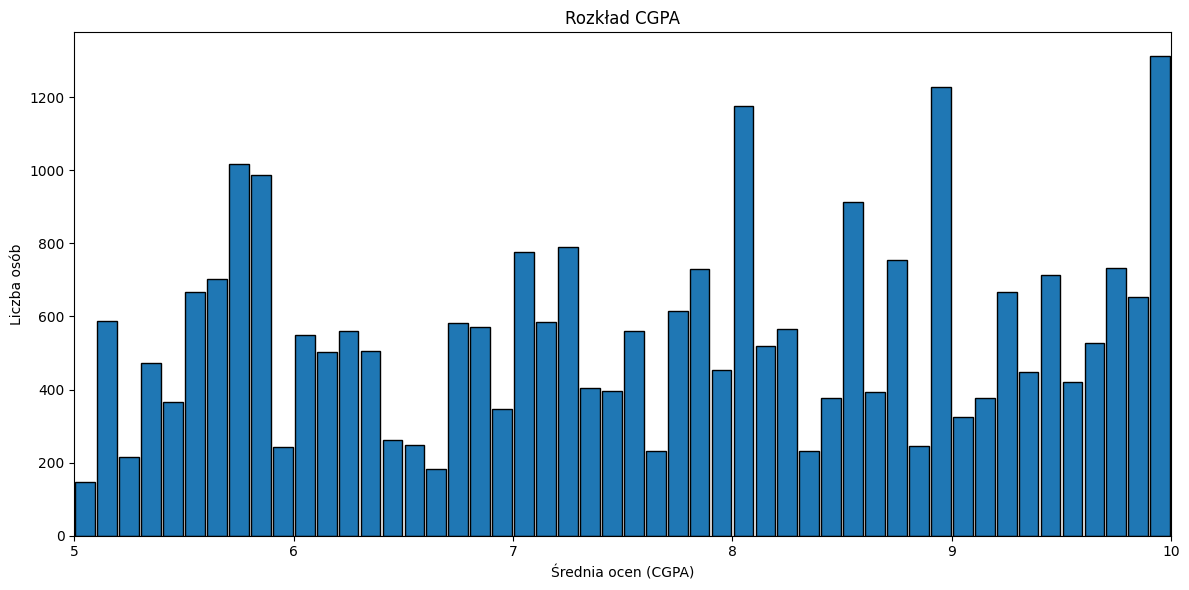

In [149]:
import numpy as np
import matplotlib.pyplot as plt

def cgpa_plot(df, xmin=5.0, xmax=10.0, bin_width=0.1, drop_below=4.0, show_removed=True):

    clean = df[df["CGPA"] >= drop_below].copy()
    if show_removed:
        removed = len(df) - len(clean)
    bins = np.arange(xmin, xmax + bin_width, bin_width)
    plt.figure(figsize=(12, 6))
    plt.hist(clean["CGPA"], bins=bins, rwidth=0.9, edgecolor="black")
    plt.xlim(xmin, xmax)
    plt.xlabel("Średnia ocen (CGPA)")
    plt.ylabel("Liczba osób")
    plt.title("Rozkład CGPA")
    plt.tight_layout()
    plt.show()
cgpa_plot(data)


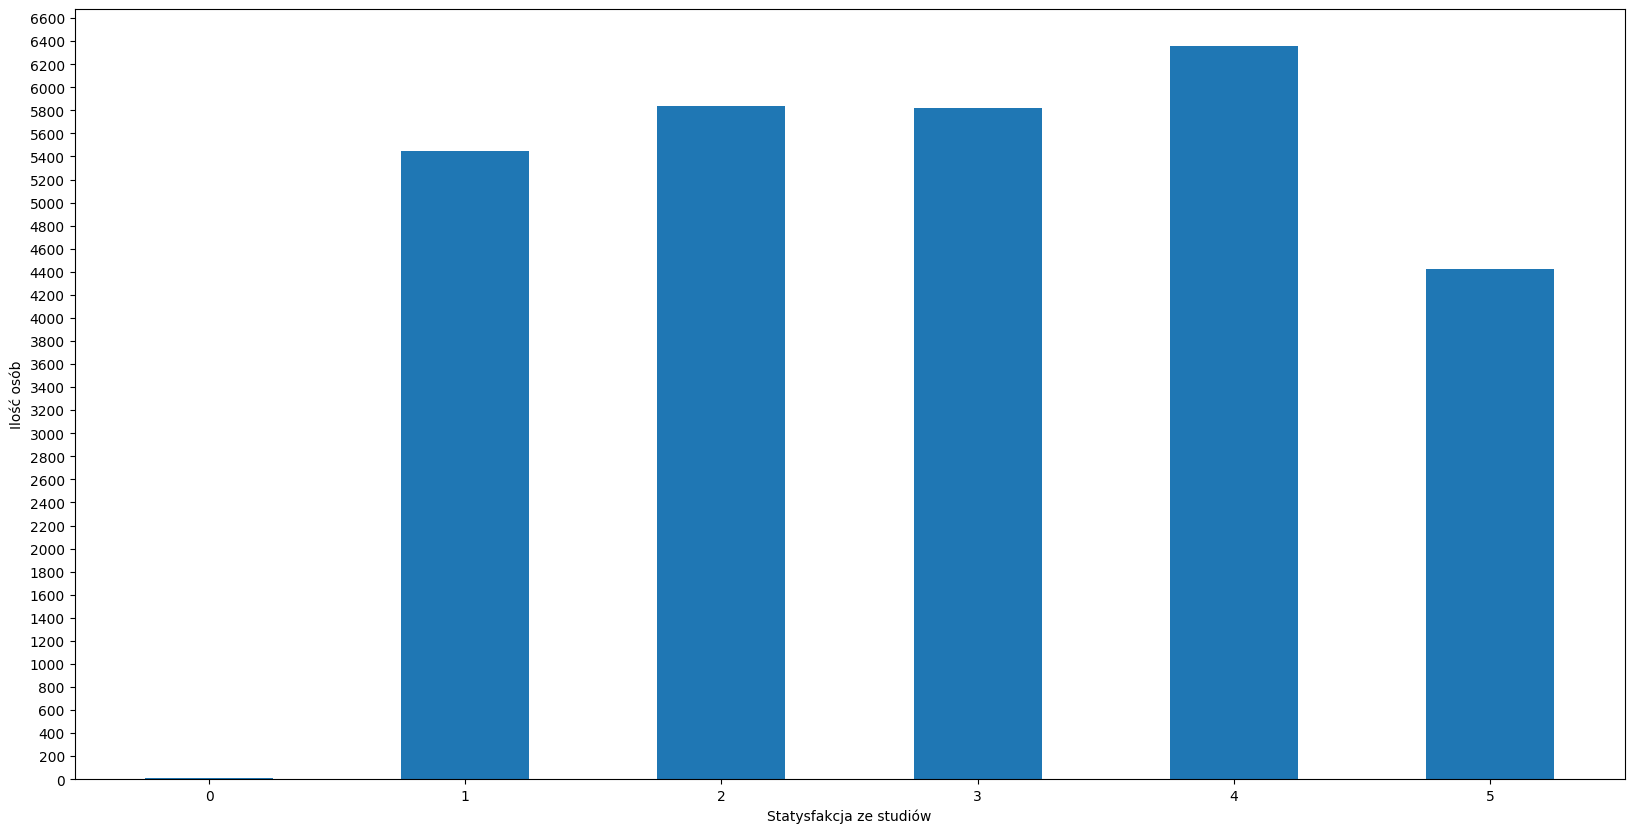

In [150]:
def satis_plot(data):
    plt.figure(figsize=(20,10))
    plt.hist(data['Study Satisfaction'],  bins = [-0.5,0.5,1.5,2.5,3.5,4.5,5.5], rwidth=0.5)
    plt.ylabel('Ilość osób')
    plt.xlabel('Statysfakcja ze studiów')
    plt.locator_params('x', nbins=10)
    plt.locator_params('y', nbins=50)


satis_plot(data)

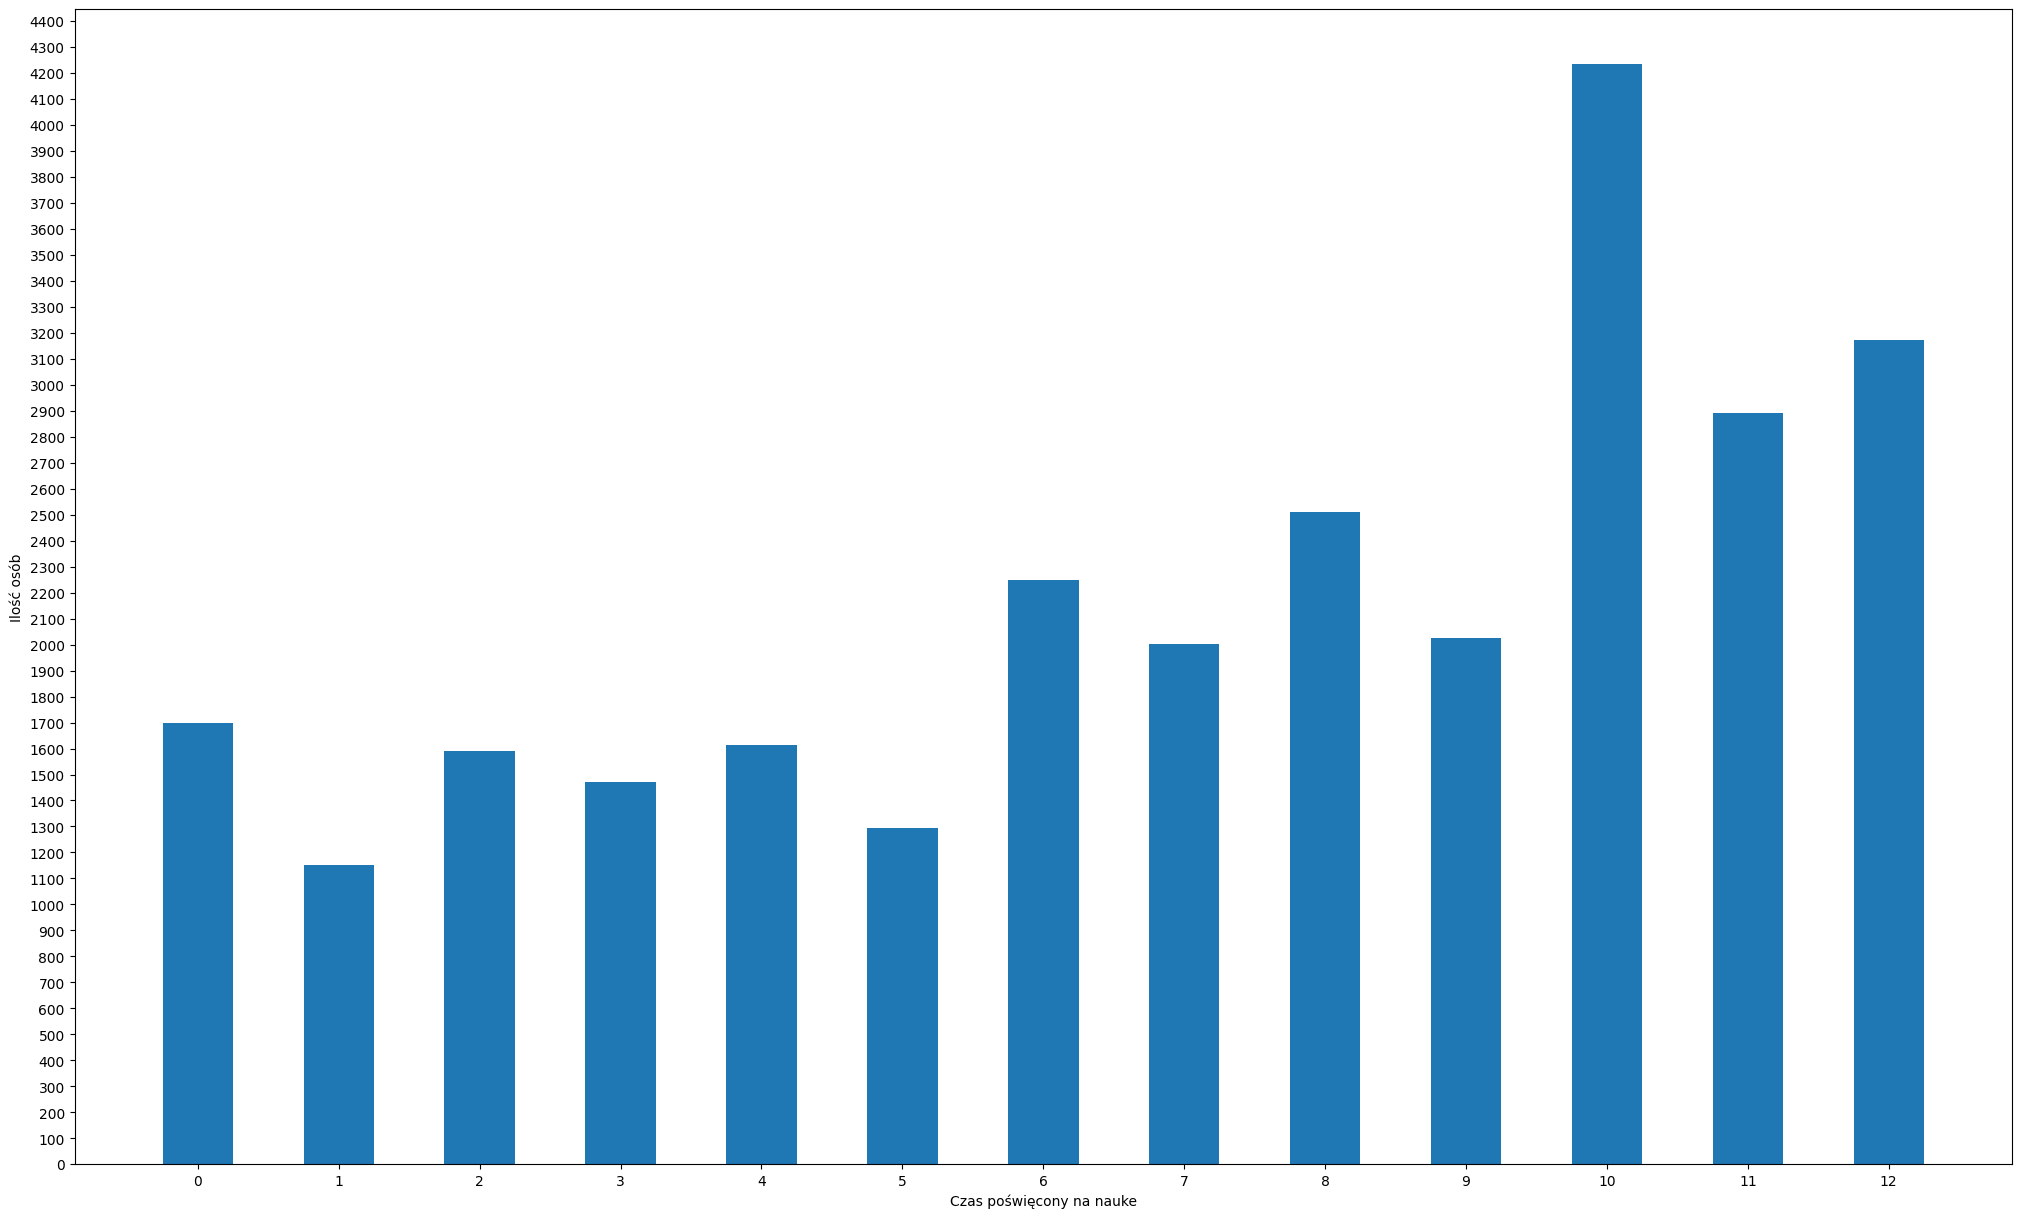

In [151]:
def study_plot(data):
    plt.figure(figsize=(25,15))
    plt.hist(data['Work/Study Hours'], bins = np.arange(-0.5, 12.5 + 1, 1), rwidth=0.5)
    plt.ylabel('Ilość osób')
    plt.xlabel('Czas poświęcony na nauke')
    plt.locator_params('x', nbins=20)
    plt.locator_params('y', nbins=50)

study_plot(data)

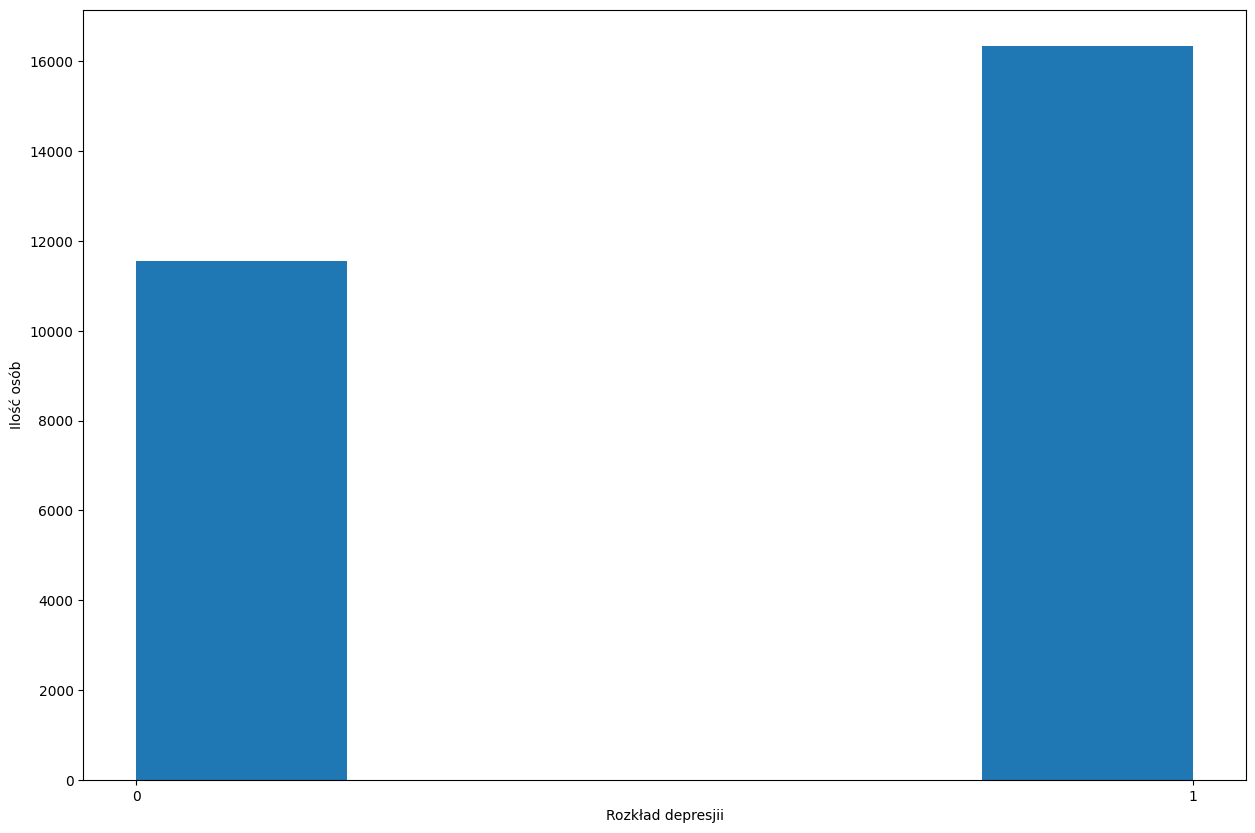

In [152]:
def depression_plot(data):
    plt.figure(figsize=(15,10))
    plt.hist(data['Depression'], bins=5)
    plt.ylabel('Ilość osób')
    plt.xlabel('Rozkład depresjii')
    plt.locator_params('x', nbins=1)
    plt.locator_params('y', nbins=10)
depression_plot(data)

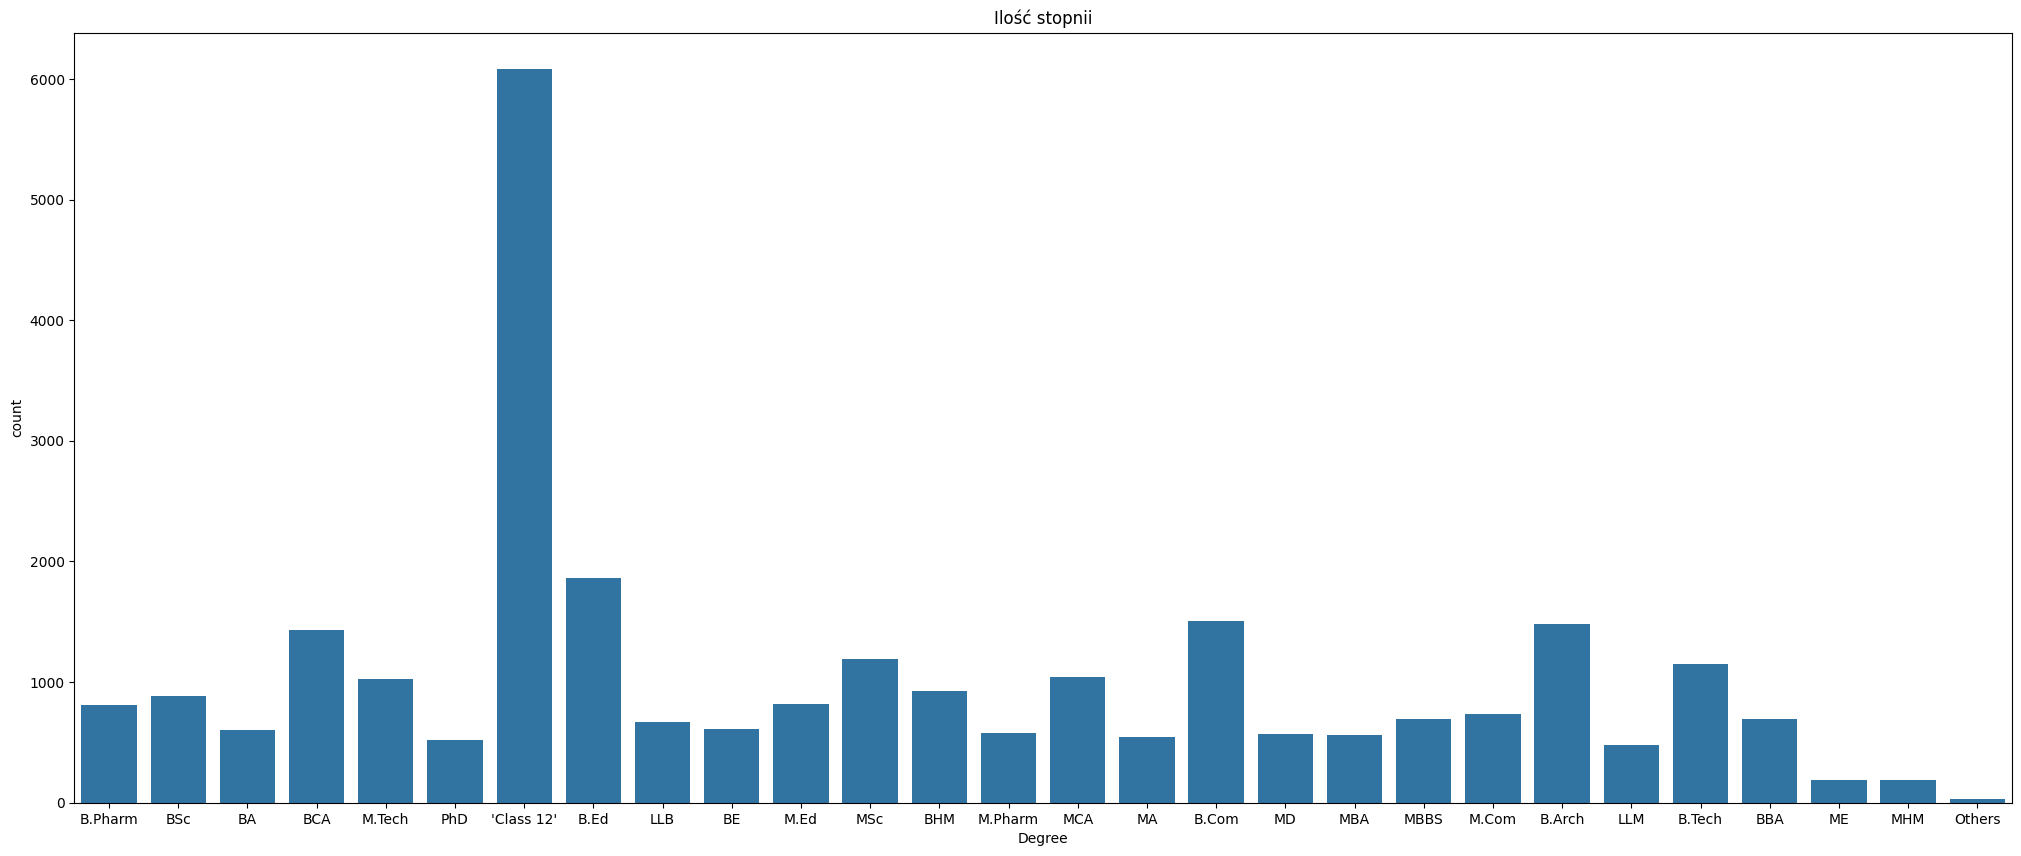

In [153]:
def degree_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Degree', data=data)
    plt.title('Ilość stopnii')
    plt.show()
degree_plot(data)

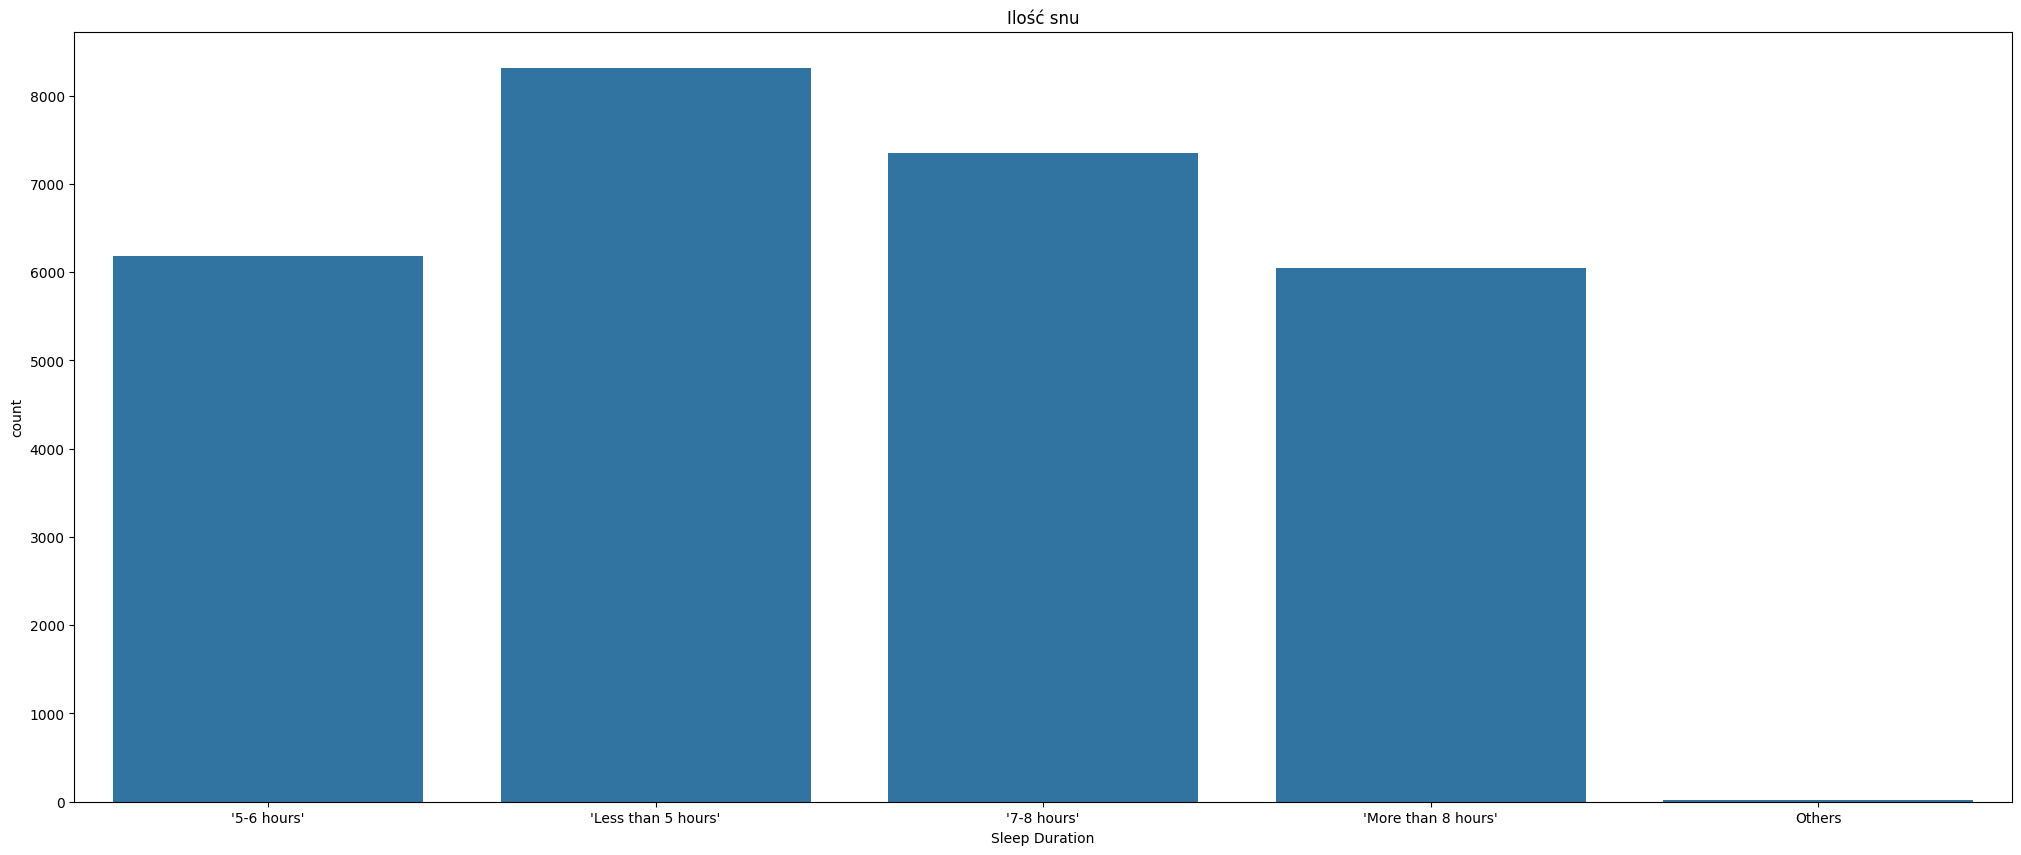

In [154]:
def sleep_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Sleep Duration', data=data)
    plt.title('Ilość snu')
    plt.show()
sleep_plot(data)

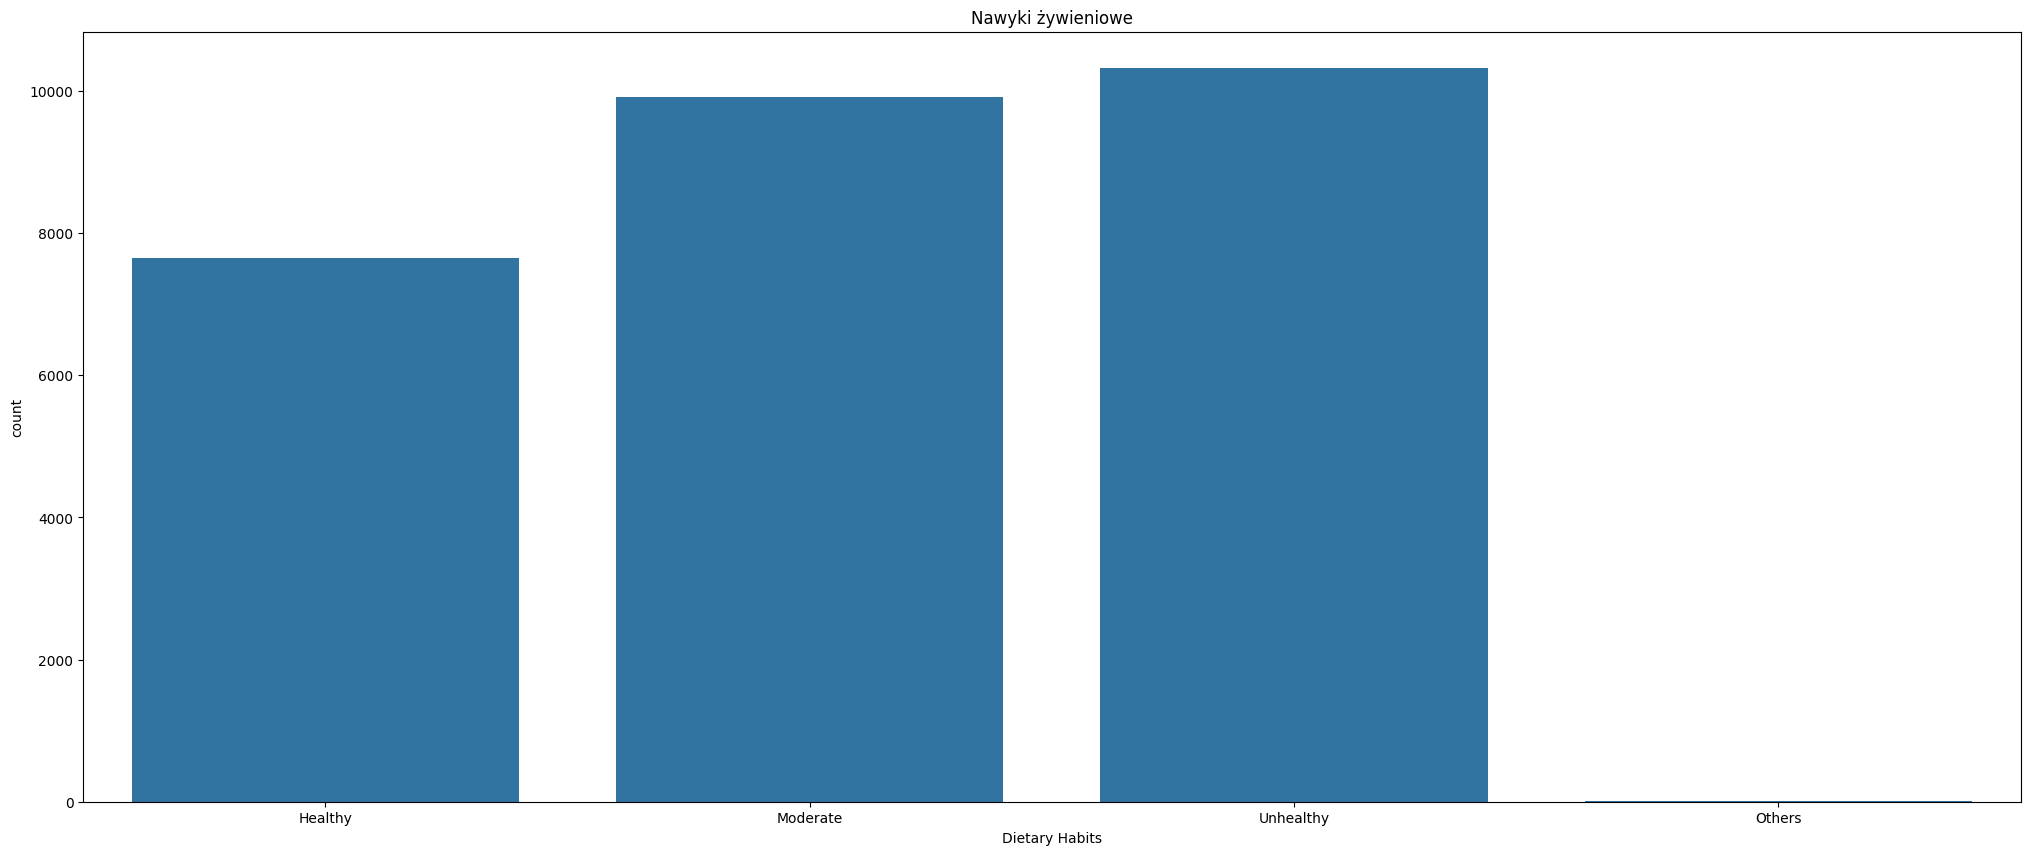

In [155]:
def food_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Dietary Habits', data=data)
    plt.title('Nawyki żywieniowe')
    plt.show()
food_plot(data)

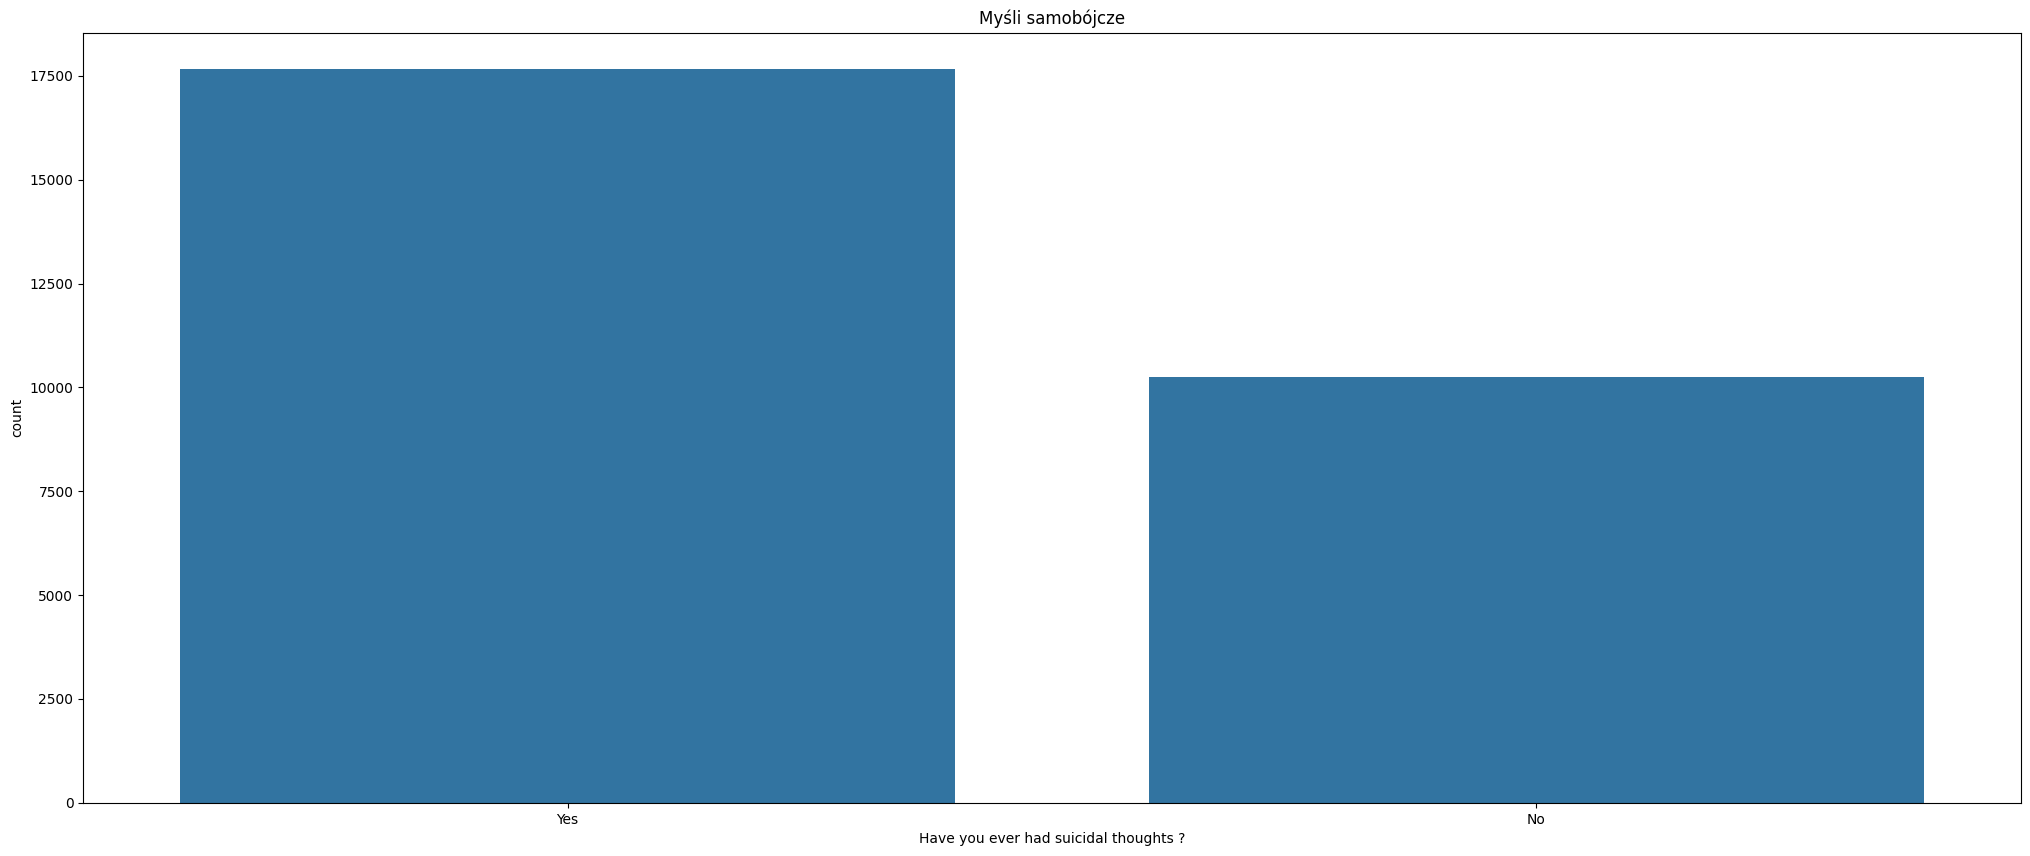

In [156]:
def thoughts_plot(data):
    plt.figure(figsize=(25,10))
    sns.countplot(x='Have you ever had suicidal thoughts ?', data=data)
    plt.title('Myśli samobójcze')
    plt.show()
thoughts_plot(data)

<h2>Preprocessing

In [157]:
new_data = data.drop(columns='City')
new_data = new_data[new_data['Profession'] == 'Student']
new_data = new_data.drop(columns=['Work Pressure', 'Profession', 'Job Satisfaction'])
new_data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


<h2>Tekst na liczby dla wartości binarnych

In [158]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
new_data['Gender_en'] = label_encoder.fit_transform(new_data['Gender'])
new_data['Suicidal_Thoughts_en'] = label_encoder.fit_transform(new_data['Have you ever had suicidal thoughts ?'])
new_data['Financial Stress_en'] = label_encoder.fit_transform(new_data['Financial Stress'])
new_data['Family_History_Mental_en'] = label_encoder.fit_transform(new_data['Family History of Mental Illness'])
new_data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Gender_en,Suicidal_Thoughts_en,Financial Stress_en,Family_History_Mental_en
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1,1,1,0,0
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,0,0,1,1
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0,1,0,0,1
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1,0,1,4,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0,0,1,0,1
27897,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0,1,0,2,1
27898,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0,1,0,1,0
27899,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1,0,1,4,0


<h2>OneHotEncoding dla reszty

In [159]:
sleep_dummies = pd.get_dummies(new_data['Sleep Duration'], prefix='sleep', dtype='int')
dietary_dummies = pd.get_dummies(new_data['Dietary Habits'], prefix='dietary', dtype='int')
degree_dummies = pd.get_dummies(new_data['Degree'], prefix='degree', dtype='int')
new_data = pd.concat([new_data, sleep_dummies, dietary_dummies, degree_dummies], axis=1)

new_data

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,...,degree_MA,degree_MBA,degree_MBBS,degree_MCA,degree_MD,degree_ME,degree_MHM,degree_MSc,degree_Others,degree_PhD
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,...,0,0,0,0,0,0,0,0,0,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,...,0,0,0,0,0,0,0,0,0,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,...,0,0,0,0,0,0,0,0,0,0
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,...,0,0,0,0,0,0,0,0,0,0
27897,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,...,0,0,0,0,0,0,0,1,0,0
27898,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,...,0,0,0,0,1,0,0,0,0,0
27899,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
new_data = new_data[new_data['degree_Others'] == 0]
new_data = new_data[new_data['sleep_Others'] == 0]
new_data = new_data[new_data['dietary_Others'] == 0]
new_data.drop(columns=['degree_Others','sleep_Others','dietary_Others'], inplace=True)


<ipython-input-160-51c746b7969c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(columns=['degree_Others','sleep_Others','dietary_Others'], inplace=True)


<h2>IQR do outlinerów

In [161]:
def filter(data, cols):
  for col in cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  return data

In [162]:
cols = ['Age', 'CGPA']

new_data = filter(new_data, cols)

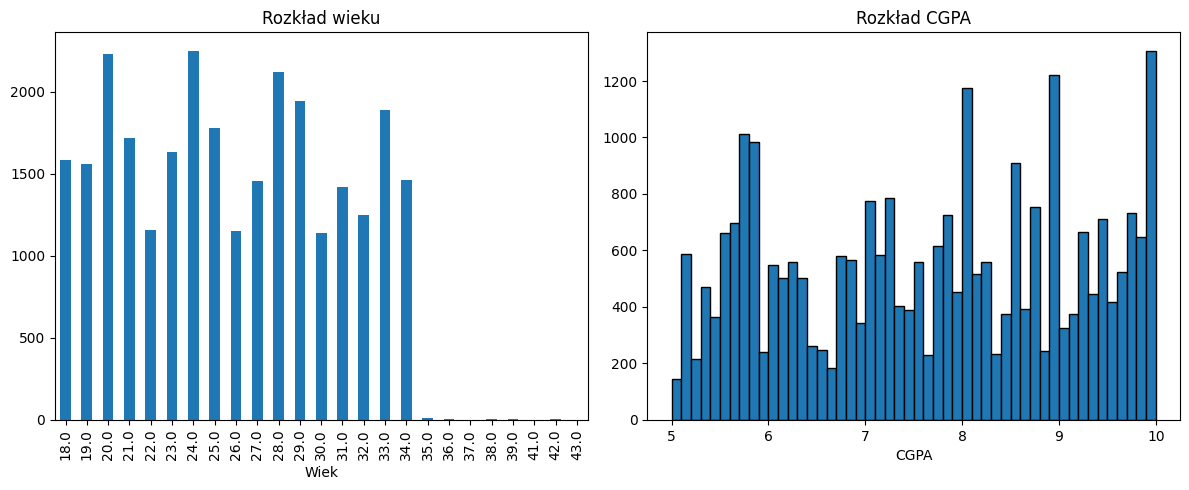

In [163]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

new_data.groupby('Age').size().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Wiek')
axes[0].set_title('Rozkład wieku')

bins = np.arange(np.floor(new_data['CGPA'].min()),
                 np.ceil(new_data['CGPA'].max()) + 0.1,
                 0.1)

axes[1].hist(new_data['CGPA'], bins=bins, edgecolor='black')
axes[1].set_xlabel('CGPA')
axes[1].set_title('Rozkład CGPA')

plt.tight_layout()
plt.show()

<h2>Podział danych

In [164]:
from sklearn.model_selection import train_test_split

target = new_data['Depression']
process_data = new_data.drop(columns=[
    'Gender', 'Have you ever had suicidal thoughts ?',
    'Financial Stress', 'Family History of Mental Illness',
    'Sleep Duration', 'Dietary Habits', 'Degree', 'Depression'  # <- Usuń też tutaj
])


labels = process_data.columns

X, y = process_data, target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_train, y_train

(        Age  Academic Pressure  CGPA  Study Satisfaction  Work/Study Hours  \
 12485  20.0                4.0  7.50                 5.0              10.0   
 730    24.0                5.0  5.76                 1.0              11.0   
 21044  29.0                3.0  9.44                 2.0              11.0   
 26925  18.0                1.0  7.15                 5.0               7.0   
 3976   34.0                1.0  9.01                 3.0              10.0   
 ...     ...                ...   ...                 ...               ...   
 23844  32.0                2.0  5.79                 1.0               0.0   
 21224  25.0                3.0  9.63                 5.0              10.0   
 1281   27.0                3.0  8.53                 4.0               7.0   
 17420  34.0                4.0  5.39                 5.0              11.0   
 18559  23.0                2.0  9.93                 5.0               6.0   
 
        Gender_en  Suicidal_Thoughts_en  Financial

<h2>Standaryzacja

In [165]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

X_train_process = standard.fit_transform(X_train)
X_test_process = standard.transform(X_test)

X_train_process, X_test_process

(array([[-1.18913556,  0.62238942, -0.1079234 , ..., -0.08341786,
         -0.21172036, -0.13989777],
        [-0.37142092,  1.34701511, -1.2957187 , ..., -0.08341786,
         -0.21172036, -0.13989777],
        [ 0.65072238, -0.10223628,  1.21640009, ..., -0.08341786,
         -0.21172036, -0.13989777],
        ...,
        [ 0.24186506, -0.10223628,  0.59519681, ..., -0.08341786,
         -0.21172036, -0.13989777],
        [ 1.67286568,  0.62238942, -1.54829586, ..., -0.08341786,
         -0.21172036, -0.13989777],
        [-0.57584958, -0.82686197,  1.55089417, ..., -0.08341786,
         -0.21172036, -0.13989777]]),
 array([[-1.18913556, -0.10223628, -0.71547387, ..., -0.08341786,
         -0.21172036, -0.13989777],
        [ 0.65072238, -0.10223628, -1.2274546 , ..., -0.08341786,
         -0.21172036, -0.13989777],
        [-1.59799288,  0.62238942, -1.02266231, ..., -0.08341786,
         -0.21172036, -0.13989777],
        ...,
        [-0.57584958, -1.55148767,  0.98430216, ..., -

<h2>Balansowanie danych

In [166]:
y_train.value_counts()

,count
Depression,
1,12198
0,8640


**Klasa depresja stanowi około 58%**

In [167]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42)

X_train_bal, y_train_bal = sampler.fit_resample(X_train_process, y_train)

y_train_bal.value_counts()

,count
Depression,
0,8640
1,8640


**Odcinamy nadwyżkę aby model nauczył się odróżniać obie klasy**

<h2>OverSampling

In [168]:
from imblearn.over_sampling import SMOTE

samplerv2 = SMOTE(random_state=42)


X_train_sm, y_train_sm = samplerv2.fit_resample(X_train_process, y_train)

y_train_sm.value_counts()

,count
Depression,
0,12198
1,12198


# Redukcja wymiarowości

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_process)
X_test_pca = pca.transform(X_test_process)

print("Kształt oryginalny treningowy: {}".format(str(X_train_process.shape)))
print("Kształt zredukowany treningowy: {}".format(str(X_train_pca.shape)))

print("Kształt oryginalny testowy: {}".format(str(X_test_process.shape)))
print("Kształt zredukowany testowy: {}".format(str(X_test_pca.shape)))

Kształt oryginalny treningowy: (20838, 43)
Kształt zredukowany treningowy: (20838, 2)
Kształt oryginalny testowy: (6946, 43)
Kształt zredukowany testowy: (6946, 2)


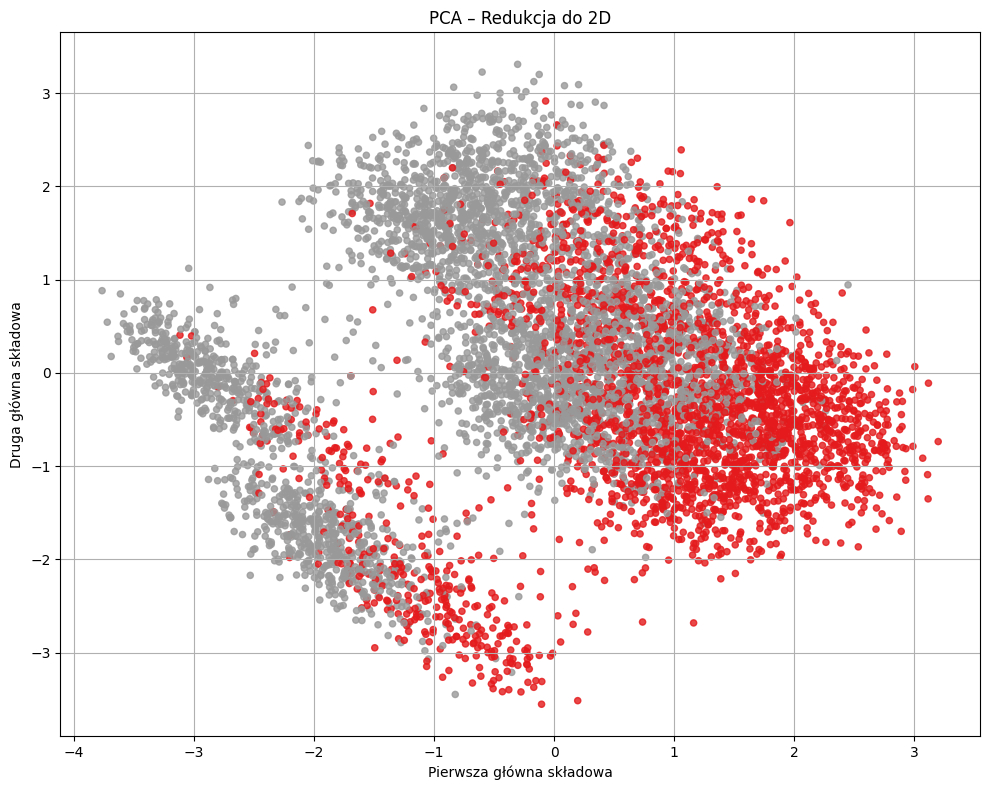

In [170]:
plt.figure(figsize=(10,8))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.8, s=20, cmap='Set1', c=y_test)
plt.xlabel("Pierwsza główna składowa")
plt.ylabel("Druga główna składowa")
plt.title('PCA – Redukcja do 2D')
plt.grid(True)
plt.tight_layout()
plt.show()

# Porównanie modeli

SVM - maszyny wektorów nośnych

In [171]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap

def SVM(X_train_process, X_test_process, y_train, y_test):
  svm = SVC(kernel='linear', probability=True, random_state=42)
  svm.fit(X_train_process, y_train)
  y_pred_svm = svm.predict(X_test_process)
  print(classification_report(y_test, y_pred_svm))
  return svm

In [172]:
svm = SVM(X_train_process, X_test_process, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2880
           1       0.86      0.89      0.87      4066

    accuracy                           0.85      6946
   macro avg       0.85      0.84      0.84      6946
weighted avg       0.85      0.85      0.85      6946



prezentacja danych

In [173]:

def showSVM(svm):
  X_combined_pca = np.vstack((X_train_pca, X_test_pca))
  y_combined = np.hstack((y_train, y_test))
  x_min, x_max = X_combined_pca[:, 0].min() - 1, X_combined_pca[:, 0].max() + 1
  y_min, y_max = X_combined_pca[:, 1].min() - 1, X_combined_pca[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightblue', 'lightcoral']))
  plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y_combined, edgecolor='k', cmap=ListedColormap(['blue', 'red']))
  plt.title("SVM")
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

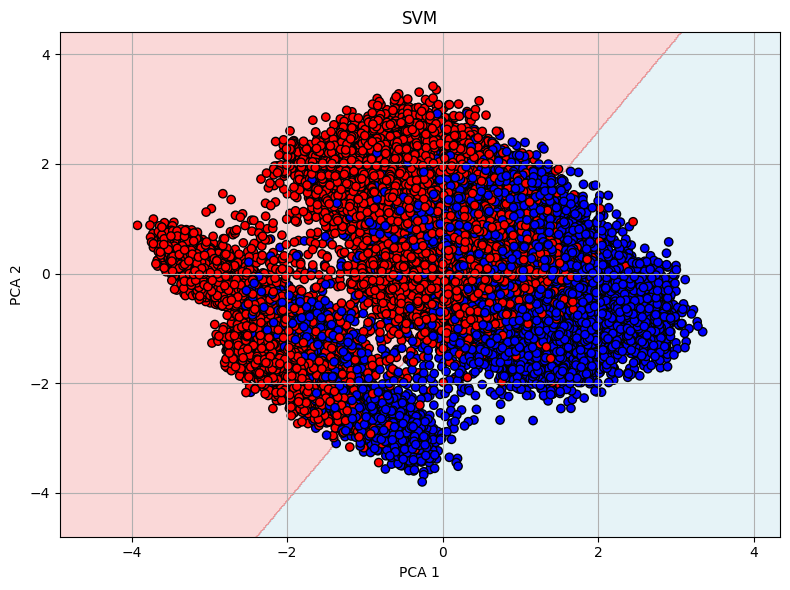

In [174]:
showSVM(svm)

Regresja logistyczna

trenowanie modelu

In [175]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

def LogReg(X_train_process, X_test_process, y_train, y_test):
  log_reg_model = LogisticRegression(max_iter=100, random_state=42)
  log_reg_model.fit(X_train_process, y_train)
  y_pred_log_reg = log_reg_model.predict(X_test_process)
  print(classification_report(y_test, y_pred_log_reg))
  return log_reg_model

In [176]:
log_reg_model = LogReg(X_train_process, X_test_process, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2880
           1       0.86      0.89      0.87      4066

    accuracy                           0.85      6946
   macro avg       0.85      0.84      0.85      6946
weighted avg       0.85      0.85      0.85      6946



In [177]:
print("X_train_process:", X_train_process.shape)
print("y_train:", y_train.shape)

X_train_process: (20838, 43)
y_train: (20838,)


prezentacja danych

In [178]:
def showLogReg(log_reg_model, X_train_pca, X_test_pca):
  X_combined_pca = np.vstack((X_train_pca, X_test_pca))
  y_combined = np.hstack((y_train, y_test))

  x_min, x_max = X_combined_pca[:, 0].min() - 1, X_combined_pca[:, 0].max() + 1
  y_min, y_max = X_combined_pca[:, 1].min() - 1, X_combined_pca[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  Z = log_reg_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('lightblue', 'lightcoral')))
  plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y_combined, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
  plt.title("Regresja logistyczna")
  plt.xlabel("Pierwsza składowa PCA")
  plt.ylabel("Druga składowa PCA")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

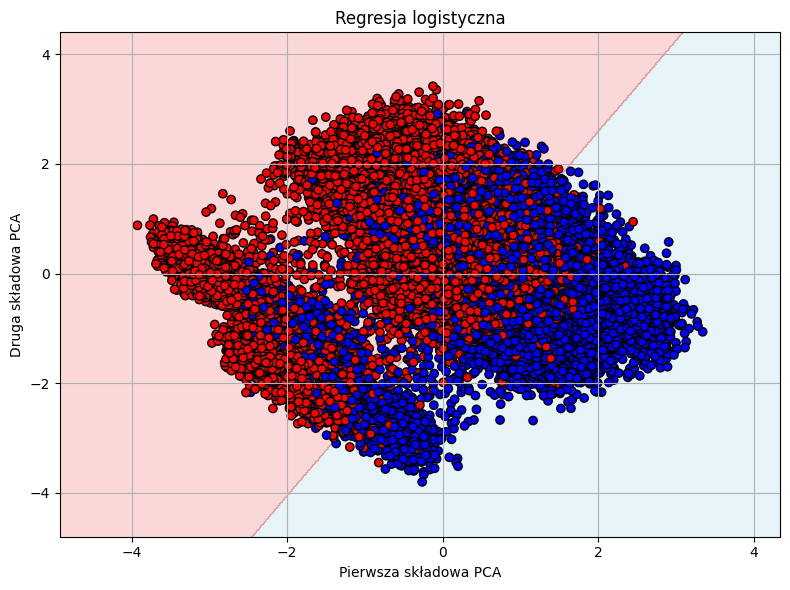

In [179]:
showLogReg(log_reg_model, X_train_pca, X_test_pca)

KNN

trenowanie modelu

In [180]:
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train_process, X_test_process, y_train, y_test, k):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train_process, y_train)
  y_pred_knn = knn_model.predict(X_test_process)
  print(classification_report(y_test, y_pred_knn))
  return knn_model

In [181]:
knn_model = KNN(X_train_process, X_test_process, y_train, y_test, 50)

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      2880
           1       0.80      0.92      0.86      4066

    accuracy                           0.82      6946
   macro avg       0.83      0.80      0.81      6946
weighted avg       0.82      0.82      0.81      6946



In [182]:
print("X_train_process:", X_train_process.shape)
print("y_train:", y_train.shape)

X_train_process: (20838, 43)
y_train: (20838,)


prezentacja danych

In [183]:
def showKNN(knn_model):
  X_combined_pca = np.vstack((X_train_pca, X_test_pca))
  y_combined = np.hstack((y_train, y_test))


  x_min, x_max = X_combined_pca[:, 0].min() - 1, X_combined_pca[:, 0].max() + 1
  y_min, y_max = X_combined_pca[:, 1].min() - 1, X_combined_pca[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  Z_knn = knn_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
  Z_knn = Z_knn.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z_knn, alpha=0.3, cmap=ListedColormap(('lightblue', 'lightcoral')))
  plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y_combined, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
  plt.title("k-NN")
  plt.xlabel("Pierwsza składowa PCA")
  plt.ylabel("Druga składowa PCA")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

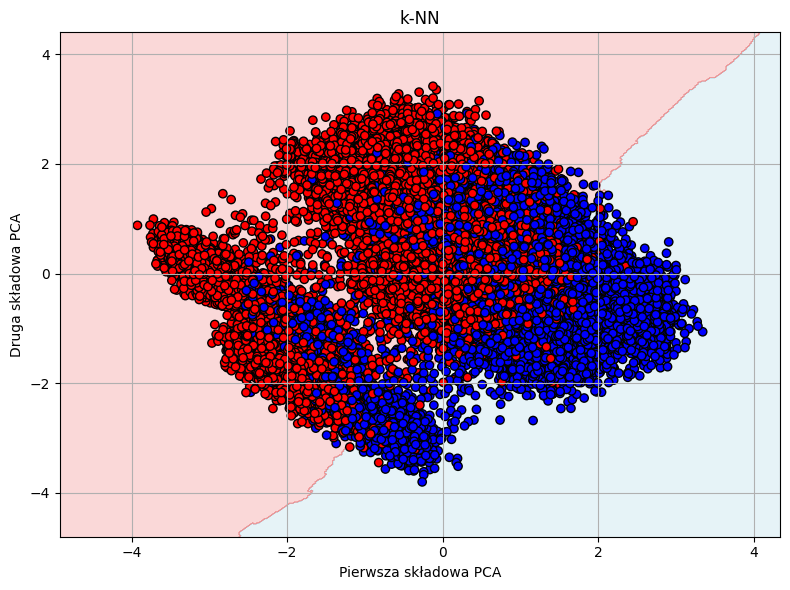

In [184]:
showKNN(knn_model)

Random Forest Classifier

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


trenowanie modelu

In [186]:
def RandomForest(X_train, X_test, y_train, y_test, n):
  forest = RandomForestClassifier(n_estimators=n, random_state=42)
  forest.fit(X_train, y_train)
  y_pred_forest = forest.predict(X_test)
  print(classification_report(y_test, y_pred_forest))
  return forest

In [187]:
print("X_train_process:", X_train_process.shape)
print("y_train:", y_train.shape)

X_train_process: (20838, 43)
y_train: (20838,)


In [188]:
forest = RandomForest(X_train_process, X_test_process, y_train, y_test, 100)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2880
           1       0.85      0.88      0.86      4066

    accuracy                           0.84      6946
   macro avg       0.84      0.83      0.83      6946
weighted avg       0.84      0.84      0.84      6946



prezentacja danych

In [203]:
def showRandonForest(forest):
  X_combined_pca = np.vstack((X_train_pca, X_test_pca))
  y_combined = np.hstack((y_train, y_test))

  x_min, x_max = X_combined_pca[:, 0].min() - 1, X_combined_pca[:, 0].max() + 1
  y_min, y_max = X_combined_pca[:, 1].min() - 1, X_combined_pca[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

  Z = forest.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['lightblue', 'lightcoral']))
  plt.scatter(X_combined_pca[:, 0], X_combined_pca[:, 1], c=y_combined, edgecolor='k', cmap=ListedColormap(['blue', 'red']))
  plt.title("Random Forest")
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")
  plt.grid(True)
  plt.tight_layout()
  plt.show()

<ipython-input-203-7885a39836d1>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


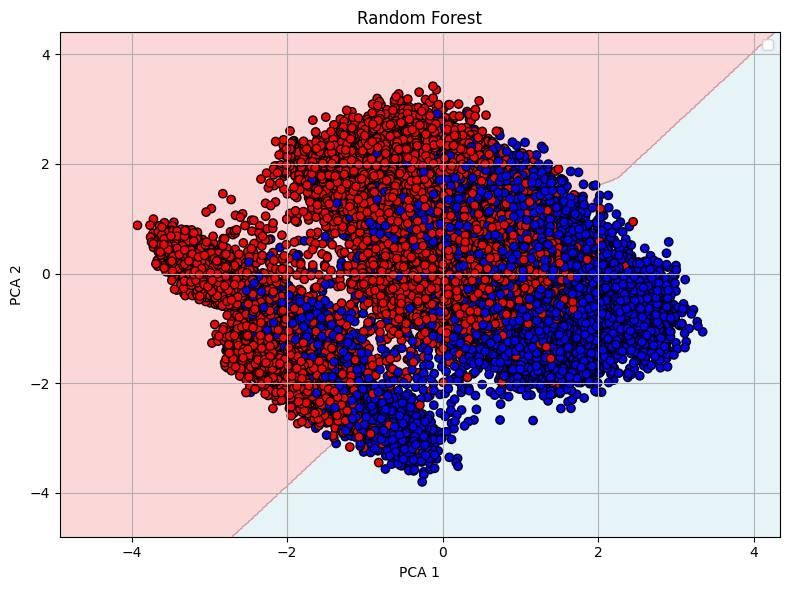

In [204]:
showRandonForest(forest)

<h2>Tesowanie na danych zbalansowanych


In [191]:
svm_bal = SVM(X_train_bal, X_test_process, y_train_bal, y_test)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2880
           1       0.88      0.85      0.86      4066

    accuracy                           0.84      6946
   macro avg       0.84      0.84      0.84      6946
weighted avg       0.85      0.84      0.84      6946



In [192]:
log_reg_model = LogReg(X_train_bal, X_test_process, y_train_bal, y_test)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      2880
           1       0.88      0.85      0.86      4066

    accuracy                           0.84      6946
   macro avg       0.84      0.84      0.84      6946
weighted avg       0.85      0.84      0.85      6946



In [193]:
knn_model = KNN(X_train_bal, X_test_process, y_train_bal, y_test, 50)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2880
           1       0.86      0.84      0.85      4066

    accuracy                           0.83      6946
   macro avg       0.82      0.82      0.82      6946
weighted avg       0.83      0.83      0.83      6946



In [194]:
forest = RandomForest(X_train_bal, X_test_process, y_train_bal, y_test, 100)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      2880
           1       0.88      0.83      0.85      4066

    accuracy                           0.83      6946
   macro avg       0.83      0.83      0.83      6946
weighted avg       0.84      0.83      0.83      6946



<h2>Po PCA

In [195]:
svm_bal = SVM(X_train_pca, X_test_pca, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2880
           1       0.79      0.83      0.81      4066

    accuracy                           0.77      6946
   macro avg       0.77      0.76      0.76      6946
weighted avg       0.77      0.77      0.77      6946



In [196]:
log_reg_model_bal = LogReg(X_train_pca, X_test_pca, y_train, y_test)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2880
           1       0.80      0.82      0.81      4066

    accuracy                           0.77      6946
   macro avg       0.77      0.76      0.76      6946
weighted avg       0.77      0.77      0.77      6946



In [197]:
knn_model_bal = KNN(X_train_pca, X_test_pca, y_train, y_test, 50)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      2880
           1       0.80      0.87      0.84      4066

    accuracy                           0.80      6946
   macro avg       0.80      0.79      0.79      6946
weighted avg       0.80      0.80      0.80      6946



In [198]:
forest_bal = RandomForest(X_train_pca, X_test_pca, y_train, y_test, 100)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2880
           1       0.79      0.83      0.81      4066

    accuracy                           0.78      6946
   macro avg       0.77      0.76      0.77      6946
weighted avg       0.78      0.78      0.78      6946



<h2>Po Oversamplingu

In [199]:
svm_sm = SVM(X_train_sm, X_test_process, y_train_sm, y_test)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2880
           1       0.88      0.85      0.87      4066

    accuracy                           0.84      6946
   macro avg       0.84      0.84      0.84      6946
weighted avg       0.85      0.84      0.85      6946



In [200]:
logRes_sm = LogReg(X_train_sm, X_test_process, y_train_sm, y_test)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      2880
           1       0.88      0.85      0.86      4066

    accuracy                           0.84      6946
   macro avg       0.84      0.84      0.84      6946
weighted avg       0.85      0.84      0.84      6946



In [201]:
knn_sm = KNN(X_train_sm, X_test_process, y_train_sm, y_test, 50)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2880
           1       0.87      0.82      0.84      4066

    accuracy                           0.82      6946
   macro avg       0.81      0.82      0.82      6946
weighted avg       0.82      0.82      0.82      6946



In [202]:
forest_sm = RandomForest(X_train_sm, X_test_process, y_train_sm, y_test, 100)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2880
           1       0.86      0.87      0.86      4066

    accuracy                           0.84      6946
   macro avg       0.84      0.83      0.84      6946
weighted avg       0.84      0.84      0.84      6946



https://www.kaggle.com/code/adilshamim8/student-depression <-Amator